### 540 Final Project

#### Estimation of network probability by Monte Carlo Simulation 

A signal sent from A to B in the network must follow a path along any available edges.Impertinent network reliability means that the signal may fail to be transmitted correctly.

Method: Evaluate the probability of network faliur given specific probabilities for the failure of each egde.

Assupution: Consider the simplest case: each egde is assumed to fail independently with the same probability with P.

Generate the samples:$\vec{x}=\left(x_{1}, x_{2} \ldots x_{20}\right)$,where $x_{i}'s$ are independent Bernouli Distribution

$$b(\vec{x})=\text {number of broken edges in the network} $$


$$h(\vec{x})=\left\{\begin{array}{l}0, \text { if } A \text { and } B \text { are connected (working)} \\ 1, \text { if } A \text { and } B \text { are not connected (failure) }\end{array}\right.$$

Then, the probability of network failure is:

$$E[h(\vec{x})]=\mu$$

However, Calculating the $\mu$ of any network in realistic size can be a very difficult combinational probelm. 

So we introduced the `Monte Carlo simulation` to sovle the problem.


#### 1.1 Draw the network graph(undirected)

In [1]:
import matplotlib.pyplot as plt 
import networkx as nx 

In [2]:
Gn = nx.Graph()

edges_list = [('A', '1'), ('A', '2'), ('A', '3'), ('A', '4'), ('1', '2'), ('1', '5'), ('1', '6'), ('2', '6'), ('2', '3'), ('3', '7'), ('3', '4'), ('4', '7'), ('4', '8'), ('5', '6'), ('5', 'B'), ('6', '7'), ('6', 'B'), ('7', '8'), ('7', 'B'), ('8', 'B')]

pos = {
        'A':(-2,0),
        '1':(-1,1.5),
        '2':(-1,0.5),
        '3':(-1,-0.5),
        '4':(-1,-1.5),
        '5':(0,1.5),
        '6': (0,0.5),
        '7':(0,-0.5),
        '8':(0,-1.5),
        'B':(1,-0),
       }

Gn.add_edges_from(edges_list, capacity=1.0)

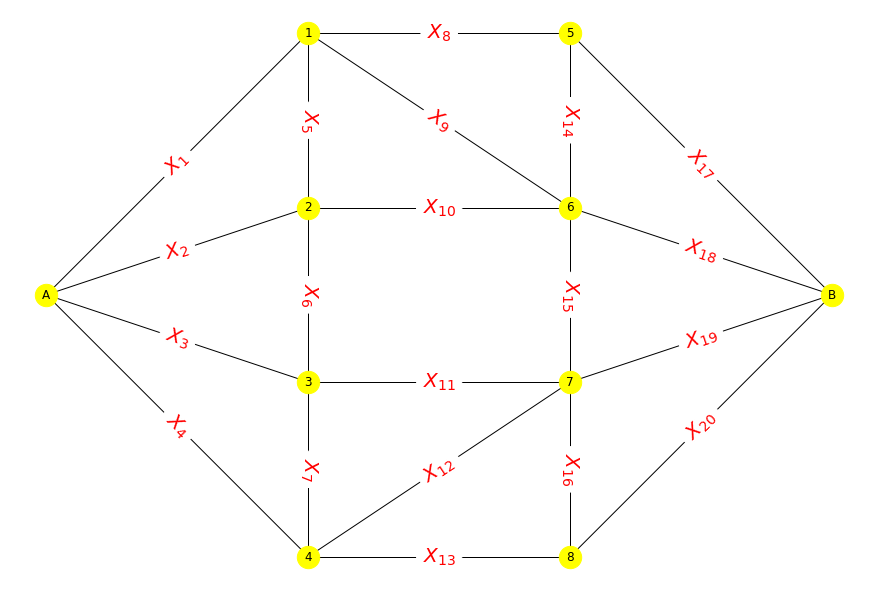

In [7]:
plt.figure(figsize=(12,8))

nx.draw(Gn, pos= pos,with_labels=True,node_size=500,node_color='yellow')

# labeling the edges
nx.draw_networkx_edge_labels(Gn,pos,edge_labels={('A','1'):'$X_1$', ('A', '2'):'$X_2$',('A', '3'):"$X_3$", ('A', '4'):"$X_4$",('1', '2'):"$X_5$", ('1', '5'):"$X_8$", ('1', '6'):"$X_9$", ('2', '6'):"$X_{10}$", ('2', '3'):"$X_{6}$", ('3', '7'):"$X_{11}$", ('3', '4'):"$X_{7}$", ('4', '7'):"$X_{12}$", ('4', '8'):"$X_{13}$", ('5', '6'):"$X_{14}$", ('5', 'B'):"$X_{17}$", ('6', '7'):"$X_{15}$", ('6', 'B'):"$X_{18}$", ('7', '8'):"$X_{16}$", ('7', 'B'):"$X_{19}$", ('8', 'B'):"$X_{20}$"} ,font_size=20,font_color='red')

# plt.savefig("Evaluation of network reliability.png")

#### 1.2 Find the minimal cut of the network

In [9]:

cut_value, partition = nx.minimum_cut(Gn,  "A", "B")
reachable, non_reachable = partition

cutset = set()
for u, nbrs in ((n, Gn[n]) for n in reachable):
    cutset.update((u, v) for v in nbrs if v in non_reachable)
print(f"The minimal cut is",sorted(cutset))

# cut_value == sum(Gn.edges[u, v]["capacity"] for (u, v) in cutset)

The minimal cut is [('5', 'B'), ('6', 'B'), ('7', 'B'), ('8', 'B')]


In [161]:
# Generate the bernoulli random samples
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import bernoulli

In [170]:
np.random.seed(seed=540)

N=100000
p = 0.1
n=20

bernoulli_rvs=bernoulli.rvs(size=N * n,p=p)
data=np.reshape(np.mat(bernoulli_rvs),(N,n))

data_bern=pd.DataFrame(data)
# data_bern

In [189]:
# x_17 = data_bern[16]
# x_18 = data_bern[17]
# x_19 = data_bern[18]
# x_20 =data_bern[19]

p_edge_fail = data_bern.sum() / N

In [190]:
P_17 =p_edge_fail[16]
P_17

0.10104

In [191]:
x_17.sum() / N  #ok

0.10104

0.09997